In [2]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd

#　統計用ツール
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from patsy import dmatrices

#　自作の空間統計用ツール
from spatialstat import *

#描画
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
import seaborn as sns
sns.set(font=['IPAmincho'])

import pyper

/Users/NIGG/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/NIGG/.matplotlib/matplotlibrc", line #515
  (fname, cnt))
/Users/NIGG/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/NIGG/.matplotlib/matplotlibrc", line #516
  (fname, cnt))


In [3]:
data = pd.read_csv("TokyoSingle.csv")

In [1]:
data.head

NameError: name 'data' is not defined

In [5]:
data[-6:-1]

,CENSUS,P,S,L,R,RW,CY,A,TS,TT,...,SOUTH,RSD,CMD,IDD,FAR,FLR,TDQ,X,Y,CITY_CODE
77495,13123043004,2780,82.60,57.44,3,4.0,200106,169,15,23,...,0,0,0,0,60,200,201503,35.72261,139.88423,13123
77496,13123053002,3480,111.56,76.69,4,4.0,201504,3,17,18,...,0,1,0,0,60,150,201503,35.71659,139.87892,13123
77497,13123021002,3490,86.76,88.59,4,7.5,201505,2,23,32,...,1,1,0,0,60,150,201503,35.69842,139.87823,13123
77498,13123051002,3600,77.00,78.53,3,8.1,201412,7,18,23,...,0,1,0,0,60,100,201503,35.72606,139.87268,13123
77499,13123055001,3999,99.77,74.94,4,6.0,201503,4,10,35,...,0,0,0,0,60,300,201503,35.69921,139.89479,13123


In [6]:
data.shape

(77501, 22)

In [7]:
data = data.dropna()

In [8]:
CITY_NAME = data['CITY_CODE'].copy()

In [9]:
CITY_NAME[CITY_NAME == 13101] = '01千代田区'
CITY_NAME[CITY_NAME == 13102] = "02中央区"
CITY_NAME[CITY_NAME == 13103] = "03港区"
CITY_NAME[CITY_NAME == 13104] = "04新宿区"
CITY_NAME[CITY_NAME == 13105] = "05文京区"
CITY_NAME[CITY_NAME == 13106] = "06台東区"
CITY_NAME[CITY_NAME == 13107] = "07墨田区"
CITY_NAME[CITY_NAME == 13108] = "08江東区"
CITY_NAME[CITY_NAME == 13109] = "09品川区"
CITY_NAME[CITY_NAME == 13110] = "10目黒区"
CITY_NAME[CITY_NAME == 13111] = "11大田区"
CITY_NAME[CITY_NAME == 13112] = "12世田谷区"
CITY_NAME[CITY_NAME == 13113] = "13渋谷区"
CITY_NAME[CITY_NAME == 13114] = "14中野区"
CITY_NAME[CITY_NAME == 13115] = "15杉並区"
CITY_NAME[CITY_NAME == 13116] = "16豊島区"
CITY_NAME[CITY_NAME == 13117] = "17北区"
CITY_NAME[CITY_NAME == 13118] = "18荒川区"
CITY_NAME[CITY_NAME == 13119] = "19板橋区"
CITY_NAME[CITY_NAME == 13120] = "20練馬区"
CITY_NAME[CITY_NAME == 13121] = "21足立区"
CITY_NAME[CITY_NAME == 13122] = "22葛飾区"
CITY_NAME[CITY_NAME == 13123] = "23江戸川区"

In [10]:
#Make Japanese Block name
BLOCK = data["CITY_CODE"].copy()
BLOCK[BLOCK == 13101] = "01都心・城南"
BLOCK[BLOCK == 13102] = "01都心・城南"
BLOCK[BLOCK == 13103] = "01都心・城南"
BLOCK[BLOCK == 13104] = "01都心・城南"
BLOCK[BLOCK == 13109] = "01都心・城南"
BLOCK[BLOCK == 13110] = "01都心・城南"
BLOCK[BLOCK == 13111] = "01都心・城南"
BLOCK[BLOCK == 13112] = "01都心・城南"
BLOCK[BLOCK == 13113] = "01都心・城南"
BLOCK[BLOCK == 13114] = "02城西・城北"
BLOCK[BLOCK == 13115] = "02城西・城北"
BLOCK[BLOCK == 13105] = "02城西・城北"
BLOCK[BLOCK == 13106] = "02城西・城北"
BLOCK[BLOCK == 13116] = "02城西・城北"
BLOCK[BLOCK == 13117] = "02城西・城北"
BLOCK[BLOCK == 13119] = "02城西・城北"
BLOCK[BLOCK == 13120] = "02城西・城北"
BLOCK[BLOCK == 13107] = "03城東"
BLOCK[BLOCK == 13108] = "03城東"
BLOCK[BLOCK == 13118] = "03城東"
BLOCK[BLOCK == 13121] = "03城東"
BLOCK[BLOCK == 13122] = "03城東"
BLOCK[BLOCK == 13123] = "03城東"

In [11]:
names = list(data.columns) + ['CITY_NAME', 'BLOCK']
data = pd.concat((data, CITY_NAME, BLOCK), axis = 1)
data.columns = names

### 変数名とデータの内容メモ
	CENSUS: 市区町村コード(9桁)
	P:      成約価格
	S:      専有面積
	L:      土地面積
	R:      部屋数
	RW:     前面道路幅員
	CY:     建築年
	A:      建築後年数(成約時)
	TS:     最寄駅までの距離
	TT:     東京駅までの時間
	ACC:    ターミナル駅までの時間
	WOOD:   木造ダミー
	SOUTH:  南向きダミー
	RSD:    住居系地域ダミー
	CMD:    商業系地域ダミー
	IDD:    工業系地域ダミー
	FAR:    建ぺい率
	FLR:    容積率
	TDQ:    成約時点(四半期)
	X:      緯度
	Y:      経度
	CITY_CODE: 市区町村コード(5桁)
	CITY_NAME: 市区町村名
	BLOCK:     地域ブロック名

## 03SummaryStat
### Summary stat and correlation

In [12]:
s_data = data[['P', 'S', 'L', 'R', 'A', 'RW', 'TS', 'TT']]

In [13]:
s_data.describe()

,P,S,L,R,A,RW,TS,TT
count,77388.000000,77388.000000,77388.000000,77388.000000,77388.000000,77388.000000,77388.000000,77388.000000
mean,5745.409689,101.496476,86.631660,3.488978,50.046067,4.898872,10.339898,30.807698
std,3056.826263,35.732280,40.390705,0.918125,92.814379,1.997453,4.865877,7.738183
min,850.000000,31.190000,19.610000,0.000000,0.000000,2.000000,0.000000,1.000000
25%,3980.000000,84.250000,60.780000,3.000000,1.000000,4.000000,7.000000,26.000000
50%,4980.000000,94.600000,79.430000,3.000000,4.000000,4.000000,10.000000,31.000000
75%,6380.000000,106.510000,100.200000,4.000000,46.000000,5.500000,13.000000,37.000000
max,30000.000000,497.810000,495.860000,47.000000,412.000000,35.000000,69.000000,154.000000


In [14]:
print(data['TDQ'].value_counts())

201104    2108
201502    1923
200504    1900
200604    1816
200602    1755
201204    1713
200404    1645
200704    1564
200501    1564
200502    1542
200601    1542
201501    1519
200503    1499
201404    1495
200702    1477
200701    1476
200603    1469
200703    1438
200902    1437
200802    1417
200403    1382
201304    1374
200804    1373
201202    1289
200104    1272
200803    1271
200204    1260
200903    1242
201201    1237
201203    1235
          ... 
201004    1161
200402    1158
200304    1105
201403    1066
201303    1056
201102    1055
201402    1038
200904    1033
200004    1021
200103     991
200202     989
200101     989
201002     981
200201     979
200102     977
201301     975
201101     974
201401     962
201003     958
201103     954
200401     926
201001     920
200302     901
200203     841
200301     839
200001     834
200002     800
200003     739
200303     689
201503     583
Name: TDQ, dtype: int64


#### 市区町村別の件数を集計

In [15]:
print(data['CITY_NAME'].value_counts())                       

12世田谷区    12340
20練馬区      9979
15杉並区      8131
11大田区      7052
21足立区      6479
19板橋区      4827
14中野区      3924
10目黒区      3418
22葛飾区      3165
23江戸川区     3156
09品川区      2424
16豊島区      2153
04新宿区      1885
17北区       1799
13渋谷区      1487
05文京区      1242
18荒川区      1005
08江東区       981
03港区        757
07墨田区       725
06台東区       371
02中央区        56
01千代田区       32
Name: CITY_NAME, dtype: int64


#### 成約時点別×市区町村別の件数を集計

In [16]:
print(data.pivot_table(index=['TDQ'], columns=['CITY_NAME'])) 

                 CENSUS                                            \
CITY_NAME        01千代田区         02中央区          03港区         04新宿区   
TDQ                                                                 
200001     1.310105e+10           NaN  1.310302e+10  1.310406e+10   
200002              NaN           NaN  1.310302e+10  1.310405e+10   
200003     1.310100e+10           NaN  1.310302e+10  1.310405e+10   
200004              NaN           NaN  1.310302e+10  1.310405e+10   
200101              NaN  1.310202e+10  1.310302e+10  1.310405e+10   
200102              NaN  1.310202e+10  1.310302e+10  1.310406e+10   
200103     1.310105e+10           NaN  1.310302e+10  1.310406e+10   
200104              NaN           NaN  1.310302e+10  1.310405e+10   
200201              NaN           NaN  1.310302e+10  1.310406e+10   
200202     1.310105e+10  1.310204e+10  1.310302e+10  1.310405e+10   
200203     1.310105e+10           NaN  1.310302e+10  1.310406e+10   
200204     1.310105e+10  1.310203e

#### 成約時点別×地域ブロック別の件数を集計

In [17]:
print(data.pivot_table(index=['TDQ'], columns=['BLOCK']))     

              CENSUS                                        P               \
BLOCK        01都心・城南       02城西・城北          03城東      01都心・城南      02城西・城北   
TDQ                                                                          
200001  1.311033e+10  1.311581e+10  1.312004e+10  7399.858911  5872.318681   
200002  1.311049e+10  1.311637e+10  1.312009e+10  7276.618938  5932.909408   
200003  1.311055e+10  1.311578e+10  1.312082e+10  7139.290816  6176.982456   
200004  1.311079e+10  1.311620e+10  1.312014e+10  7459.767967  5993.241259   
200101  1.311038e+10  1.311591e+10  1.312024e+10  7151.689342  5833.323113   
200102  1.311053e+10  1.311655e+10  1.312063e+10  7554.334135  5519.058796   
200103  1.311082e+10  1.311643e+10  1.312039e+10  7442.875670  5529.286207   
200104  1.311045e+10  1.311618e+10  1.312042e+10  7318.639191  5471.789796   
200201  1.311046e+10  1.311595e+10  1.312069e+10  6842.570213  5469.279188   
200202  1.311071e+10  1.311551e+10  1.312051e+10  6772.594912  5

## 04Histogram

#### 価格(真数)

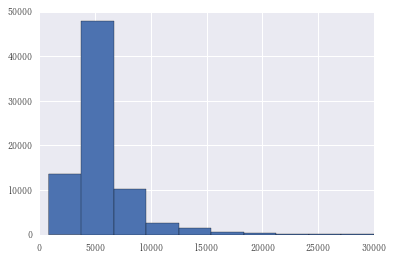

In [18]:
data['P'].hist()                       

#### 価格(自然対数)

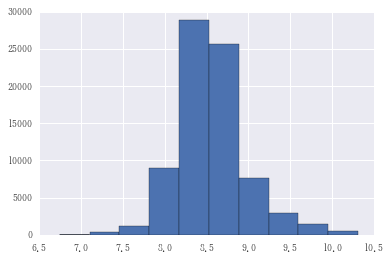

In [19]:
(np.log(data['P'])).hist()                

#### 建築後年数

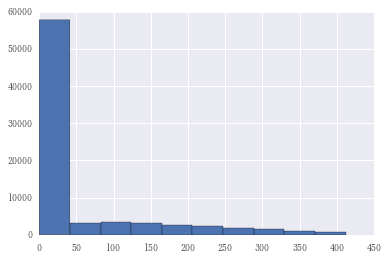

In [20]:
data['A'].hist()                       

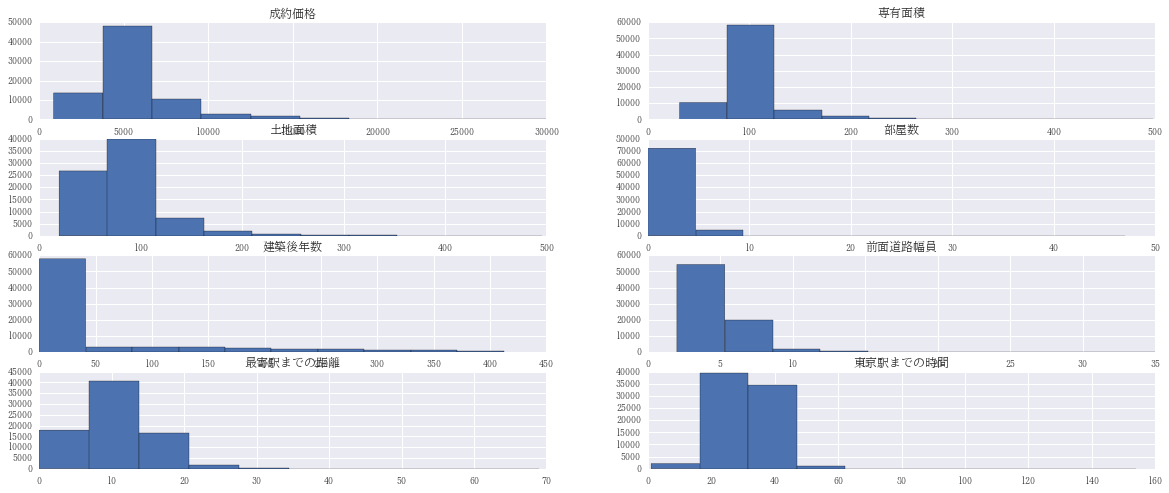

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(4, 2, 1)
data['P'].hist()
plt.title(u"成約価格")

plt.subplot(4, 2, 2)
data['S'].hist()
plt.title("専有面積")

plt.subplot(4, 2, 3)
data['L'].hist()
plt.title("土地面積")

plt.subplot(4, 2, 4)
data['R'].hist()
plt.title("部屋数")

plt.subplot(4, 2, 5)
data['A'].hist()
plt.title("建築後年数")

plt.subplot(4, 2, 6)
data['RW'].hist()
plt.title("前面道路幅員")

plt.subplot(4, 2, 7)
data['TS'].hist()
plt.title("最寄駅までの距離")

plt.subplot(4, 2, 8)
data['TT'].hist()
plt.title(u"東京駅までの時間")

## 05Plot
#### 件数の推移

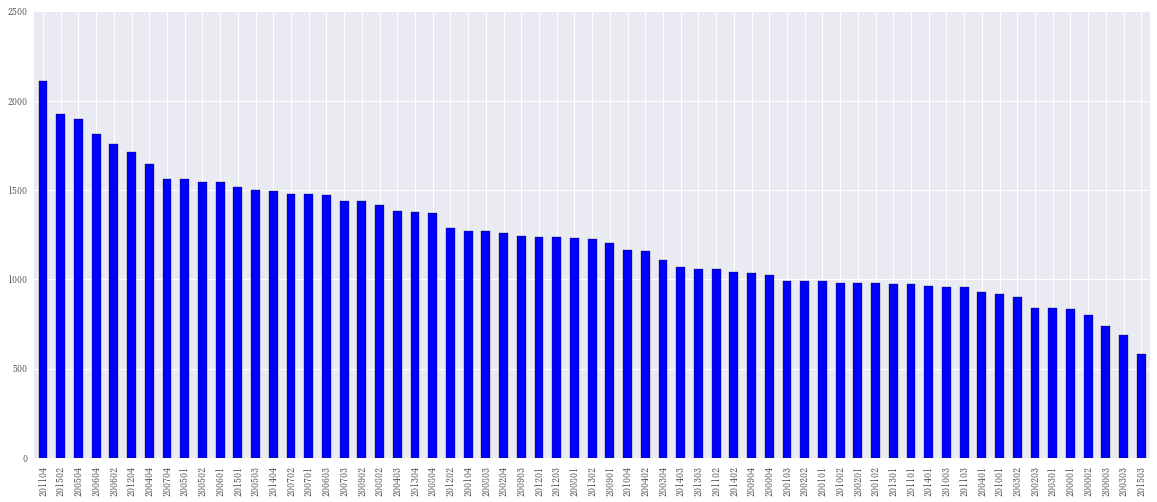

In [22]:
plt.figure(figsize=(20,8))
data['TDQ'].value_counts().plot(kind='bar') 

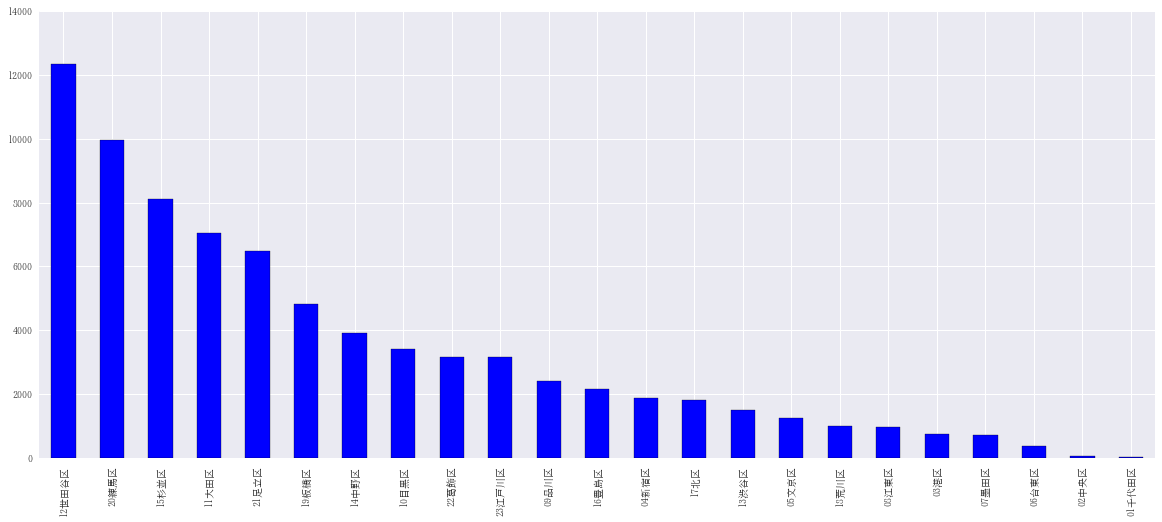

In [23]:
plt.figure(figsize=(20,8))
data['CITY_NAME'].value_counts().plot(kind='bar') #市区町村別の件数

### MultipleRegression
###  Regression

#### Model1

In [24]:
def fml_build(varlst):
    """
    Binding OLS formula from a list of variable names
    varlst: variable names, the 1st var should be endogeneouse variable
    """
    varlst.reverse()
    fml=varlst.pop()+'~'
    while len(varlst) != 0:
        fml=fml+'+'+varlst.pop()
    return fml

In [25]:
vars = ['P', 'S', 'L', 'R', 'RW', 'A', 'TS', 'TT', 'WOOD', 'SOUTH', 'CMD', 'IDD', 'FAR', 'FLR']
eq = fml_build(vars)

y, X = dmatrices(eq, data=data, return_type='dataframe')

logy = np.log(y)

model1 = sm.OLS(logy, X, intercept=True)
reg1 = model1.fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     8996.
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:56:03   Log-Likelihood:                -5306.9
No. Observations:               77388   AIC:                         1.064e+04
Df Residuals:                   77374   BIC:                         1.077e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.7594      0.013    669.274      0.0

#### Model2

In [26]:
vars = ['P', 'S', 'L', 'R', 'RW', 'A', 'TS', 'TT', 'WOOD', 'SOUTH', 'CMD', 'IDD', 'FAR']
eq = fml_build(vars)

y, X = dmatrices(eq, data=data, return_type='dataframe')

CITY_NAME = pd.get_dummies(data['CITY_NAME'])
TDQ = pd.get_dummies(data['TDQ'])

X = pd.concat((X, CITY_NAME, TDQ), axis=1)

logy = np.log(y)

model2 = sm.OLS(logy, X, intercept=True)
reg2 = model2.fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     3834.
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:56:05   Log-Likelihood:                 26824.
No. Observations:               77388   AIC:                        -5.345e+04
Df Residuals:                   77291   BIC:                        -5.256e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.8672      0.009    880.317      0.0

### F value

In [27]:
reg1.fvalue

8996.2042653827066

In [28]:
reg2.fvalue

3833.9161361682782

### AIC

In [29]:
reg1.aic

10641.747737480211

In [30]:
reg2.aic

-53454.990898209217

### F test

In [31]:
reg1_n = len(reg1.params)
reg2_n = len(reg2.params)

In [32]:
reg1.f_test(np.identity(reg1_n))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 6040199.7470554]]), p=0.0, df_denom=77374, df_num=14>

In [33]:
reg2.f_test(np.identity(reg2_n))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 3015155.96012016]]), p=0.0, df_denom=77291, df_num=99>

### White-Test

### Heterogeneity
### WLS
### Plot

#### 建築後年数

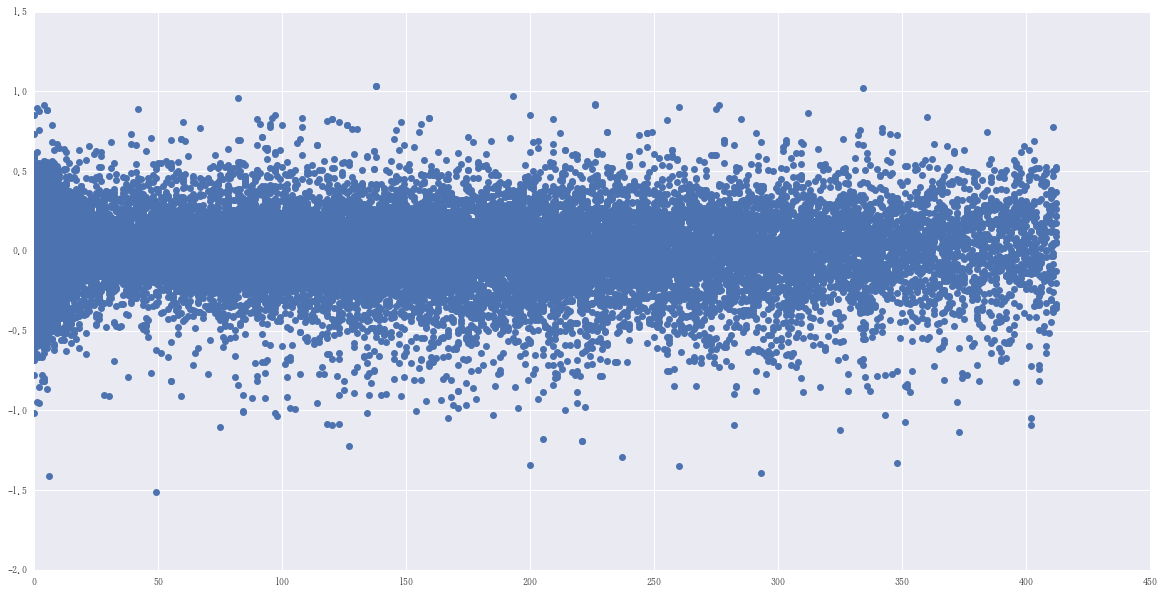

In [34]:
plt.figure(figsize=(20,10))
plt.plot(data['A'], reg2.resid, 'o')

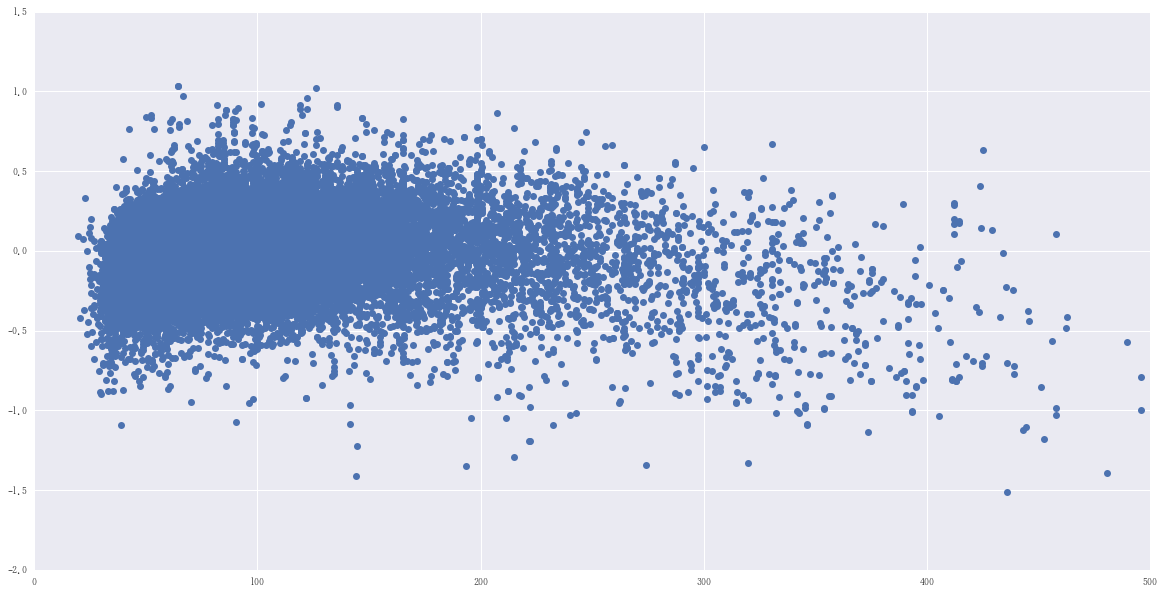

In [35]:
plt.figure(figsize=(20,10))
plt.plot(data['L'], reg2.resid, 'o')

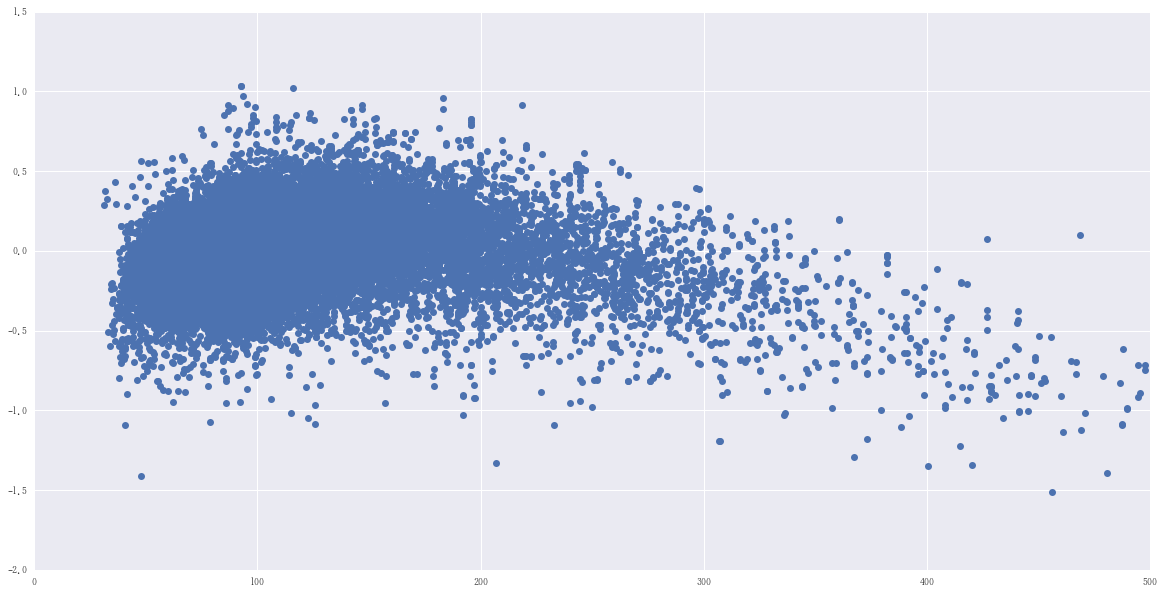

In [36]:
plt.figure(figsize=(20,10))
plt.plot(data['S'], reg2.resid, 'o')

### WLS

In [37]:
vars = ['P', 'S', 'L', 'R', 'RW', 'A', 'TS', 'TT', 'WOOD', 'SOUTH', 'CMD', 'IDD', 'FAR']
eq = fml_build(vars)

y, X = dmatrices(eq, data=data, return_type='dataframe')

CITY_NAME = pd.get_dummies(data['CITY_NAME'])
TDQ = pd.get_dummies(data['TDQ'])

X = pd.concat((X, CITY_NAME, TDQ), axis=1)

logy = np.log(y)

S = data['S'].values

model3 = sm.GLS(logy, X, intercept=True, sigma=1/S)
reg3 = model3.fit()
print(reg3.summary())

                            GLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.988
Model:                            GLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 6.403e+04
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:56:10   Log-Likelihood:                 18660.
No. Observations:               77388   AIC:                        -3.713e+04
Df Residuals:                   77291   BIC:                        -3.623e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.0334      0.010    844.794      0.0

#### Robust cluster standard error: using TOWER_ID as a cluster variable [vce(cluster TOWER_ID) in Stata]
#### rcse  <- robust.se(reg2, dataIID)
#### print(rcse)

### Hedonic
#### RPPI: Time dummy hedonic

In [38]:
data01 = data[data['BLOCK'] == "01都心・城南"]
data02 = data[data['BLOCK'] == "02城西・城北"]
data03 = data[data['BLOCK'] == "03城東"]

In [39]:
# R のインスタンスを作る
r = pyper.R(use_pandas='True')

In [40]:
r.assign("data01", data01)
r("index_mean_01 <- tapply(data01$P, data01$TDQ, mean)")
r.assign("data02", data02)
r("index_mean_02 <- tapply(data02$P, data02$TDQ, mean)")
r.assign("data03", data03)
r("index_mean_03 <- tapply(data03$P, data03$TDQ, mean)")

'try({index_mean_03 <- tapply(data03$P, data03$TDQ, mean)})\n'

#### 2000Q1 = 1として指数化

In [41]:
r("index_mean_01 <- index_mean_01 / index_mean_01[1]")
r("index_mean_02 <- index_mean_02 / index_mean_02[1]")
r("index_mean_03 <- index_mean_03 / index_mean_03[1]")

r("index_mean    <- cbind(index_mean_01, index_mean_02, index_mean_03)")
r("index_mean_ts <- ts(index_mean, start = 2000, end = 2015.5, freq = 4)")

'try({index_mean_ts <- ts(index_mean, start = 2000, end = 2015.5, freq = 4)})\n'

In [42]:
index_mean = r.get("index_mean")

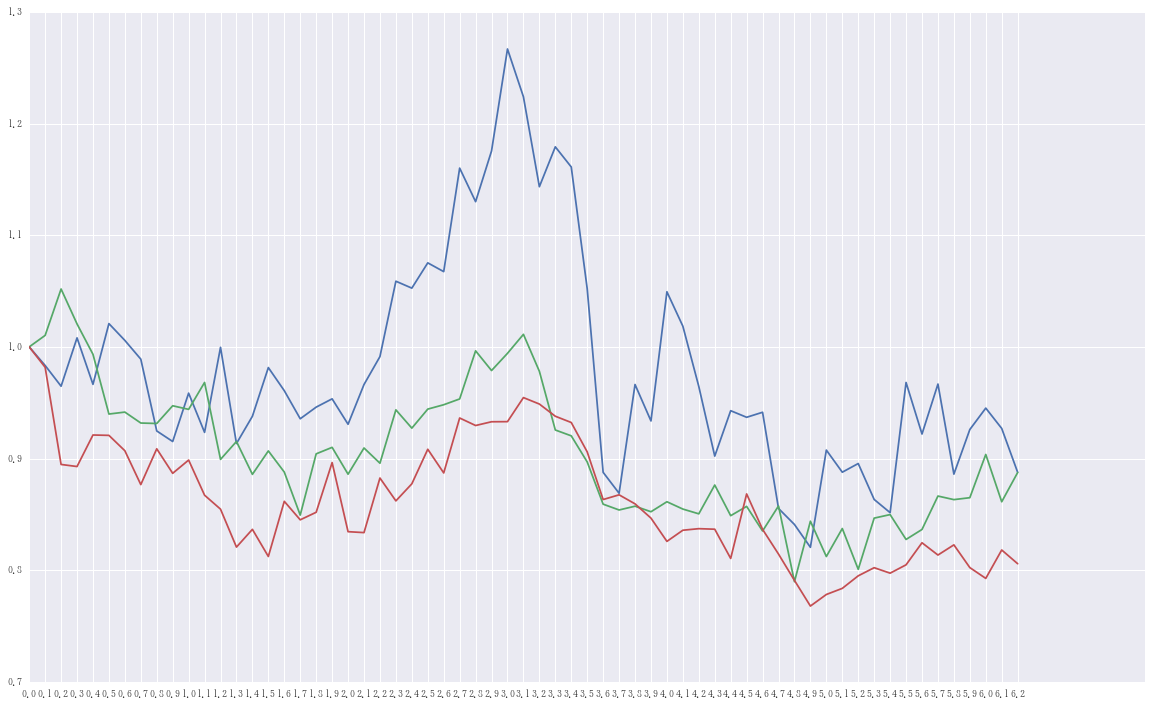

In [44]:
plt.figure(figsize=(20,12))
plt.plot(index_mean)
plt.xticks(np.arange(0, len(index_mean), 1), np.arange(0, 15.5, 0.1))
plt.show()

#### 01都心・城南=blue, 02城西・城北=red, 03城東=green

#### White standard error [vce(robust) option in Stata]

In [45]:
white = reg2.HC0_se
print(white)

Intercept    0.010599
S            0.000059
L            0.000044
R            0.001211
RW           0.000371
A            0.000010
TS           0.000147
TT           0.000130
WOOD         0.002972
SOUTH        0.001580
CMD          0.003723
IDD          0.002111
FAR          0.000136
01千代田区       0.051589
02中央区        0.037495
03港区         0.010650
04新宿区        0.004786
05文京区        0.005755
06台東区        0.011093
07墨田区        0.006732
08江東区        0.006118
09品川区        0.004674
10目黒区        0.004754
11大田区        0.003643
12世田谷区       0.003646
13渋谷区        0.007320
14中野区        0.003694
15杉並区        0.003561
16豊島区        0.004166
17北区         0.004736
               ...   
200802       0.004594
200803       0.004705
200804       0.004612
200901       0.004282
200902       0.004106
200903       0.005091
200904       0.005225
201001       0.005817
201002       0.005262
201003       0.005192
201004       0.004327
201101       0.005413
201102       0.005180
201103       0.005118
201104    

### Hedonic

In [46]:
vars = ['P', 'S', 'L', 'R', 'RW', 'A', 'TS', 'TT', 'WOOD', 'SOUTH', 'CMD', 'IDD', 'FAR']
eq = fml_build(vars)

y, X = dmatrices(eq, data=data01, return_type='dataframe')

CITY_NAME = pd.get_dummies(data01['CITY_NAME'])
TDQ = pd.get_dummies(data01['TDQ'])

X = pd.concat((X, CITY_NAME, TDQ), axis=1)

logy = np.log(y)

hed01_model = sm.OLS(logy, X, intercept=True)
hed01 = hed01_model.fit()
print(hed01.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1263.
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:56:59   Log-Likelihood:                 6279.5
No. Observations:               29451   AIC:                        -1.239e+04
Df Residuals:                   29368   BIC:                        -1.170e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7893      0.016    489.396      0.0

In [47]:
vars = ['P', 'S', 'L', 'R', 'RW', 'A', 'TS', 'TT', 'WOOD', 'SOUTH', 'CMD', 'IDD', 'FAR']
eq = fml_build(vars)

y, X = dmatrices(eq, data=data02, return_type='dataframe')

CITY_NAME = pd.get_dummies(data02['CITY_NAME'])
TDQ = pd.get_dummies(data02['TDQ'])

X = pd.concat((X, CITY_NAME, TDQ), axis=1)

logy = np.log(y)

hed02_model = sm.OLS(logy, X, intercept=True)
hed02 = hed02_model.fit()
print(hed02.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1277.
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:57:00   Log-Likelihood:                 16370.
No. Observations:               32426   AIC:                        -3.258e+04
Df Residuals:                   32344   BIC:                        -3.189e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.1563      0.011    627.286      0.0

In [48]:
vars = ['P', 'S', 'L', 'R', 'RW', 'A', 'TS', 'TT', 'WOOD', 'SOUTH', 'CMD', 'IDD', 'FAR']
eq = fml_build(vars)

y, X = dmatrices(eq, data=data03, return_type='dataframe')

CITY_NAME = pd.get_dummies(data03['CITY_NAME'])
TDQ = pd.get_dummies(data03['TDQ'])

X = pd.concat((X, CITY_NAME, TDQ), axis=1)

logy = np.log(y)

hed03_model = sm.OLS(logy, X, intercept=True)
hed03 = hed03_model.fit()
print(hed03.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     460.8
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:57:00   Log-Likelihood:                 7893.5
No. Observations:               15511   AIC:                        -1.563e+04
Df Residuals:                   15431   BIC:                        -1.502e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.6433      0.015    430.813      0.0

In [ ]:
r.assign("data", data)

In [ ]:
r("t  <- sort(unique(data$TDQ))")
r("tt <- paste('factor(TDQ)', t, sep = "")")

In [ ]:
tt = r.get("tt")
TDQ_hd01 = hed01.params[1:(len(tt)+1)]
TDQ_hd02 = hed02.params[1:(len(tt)+1)]
TDQ_hd03 = hed03.params[1:(len(tt)+1)]

In [ ]:
index_hd_01 = np.exp(TDQ_hd01)
index_hd_02 = np.exp(TDQ_hd02)
index_hd_03 = np.exp(TDQ_hd03)

index_hd = np.array([index_hd_01, index_hd_02, index_hd_03])
plt.plot(index_hd.T)

In [ ]:
'''
par(mfrow = c(3, 1))
ts.plot(index_mean_ts[, 1], index_hd_ts[, 1], col = c("lightblue", "blue"),   lwd = c(1, 1.5), main = "都心5区・城南地域")
ts.plot(index_mean_ts[, 2], index_hd_ts[, 2], col = c("pink", "red"),         lwd = c(1, 1.5), main = "城西・城北地域")
ts.plot(index_mean_ts[, 3], index_hd_ts[, 3], col = c("lightgreen", "green"), lwd = c(1, 1.5), main = "城東地域")
par(mfrow = c(1, 1))


#Weight
volume01 <- tapply(data01$P, data01$TDQ, sum)
volume02 <- tapply(data02$P, data02$TDQ, sum)
volume03 <- tapply(data03$P, data03$TDQ, sum)
volume   <- tapply(data$P,   data$TDQ,   sum)

weight01 <- volume01 / volume
weight02 <- volume02 / volume
weight03 <- volume03 / volume
weight   <- cbind(weight01, weight02, weight03)

fixed_weight <- matrix(rep(weight[1, ], length(t)), ncol = 3, byrow = T)

#Las
index_laspeyres <- apply(index_hd * fixed_weight, 1, sum)

#Pache
index_paasche   <- apply(index_hd^-1 * weight, 1, sum)^-1

#Fisher 
index_fisher    <- (index_laspeyres * index_paasche)^0.5



#Plot
composite_index    <- cbind(index_laspeyres, index_paasche, index_fisher)
composite_index_ts <- ts(composite_index, start = 2000, end = 2015.5, freq = 4)
ts.plot(composite_index_ts, col = c("navy", "brown", "orange"))

ts.plot(index_hd_ts, composite_index_ts[, 1],   col = c("blue", "red", "green", "navy"),                    lwd = c(1, 1, 1, 2))
ts.plot(index_hd_ts, composite_index_ts[, 1:2], col = c("blue", "red", "green", "navy", "brown"),           lwd = c(1, 1, 1, 2, 2))
ts.plot(index_hd_ts, composite_index_ts[, 1:3], col = c("blue", "red", "green", "navy", "brown", "orange"), lwd = c(1, 1, 1, 2, 2, 3))


write.csv(weight,          "output/08_weight.csv")
write.csv(index_hd,        "output/09_index_hd.csv")
write.csv(composite_index, "output/10_composite_index.csv")'''